# (E16)16th_Project-Super_Resolution
***
## 1. 원본이 고화질인 이미지
## 2. 원본이 저화질인 이미지
## 3. SRGAN을 이용해 고해상도 gif 생성하기
***

## 1. 원본이 고화질인 이미지

    1) (적당히) 높은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.

(1080, 1920, 3)


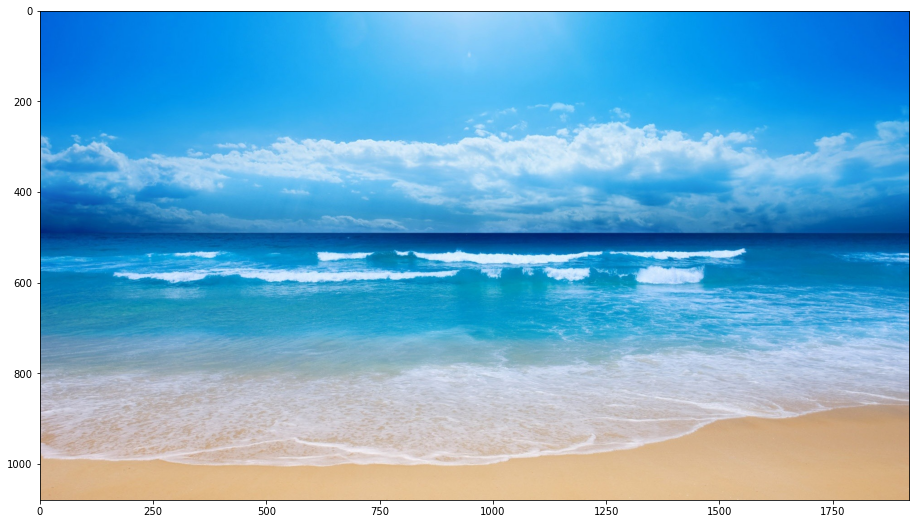

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# 데이터를 불러옵니다.
image_path = os.getenv('HOME') + '/aiffel/super_resolution/high_resolution_1920x1080.jpg'
hr = cv2.imread(image_path)
hr = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)

print(hr.shape)
plt.figure(figsize=(16, 9))
plt.imshow(hr)
plt.show()

    2) 불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 1/4로 줄입니다. cv2.resize()를 사용해 봅시다.

(270, 480, 3)


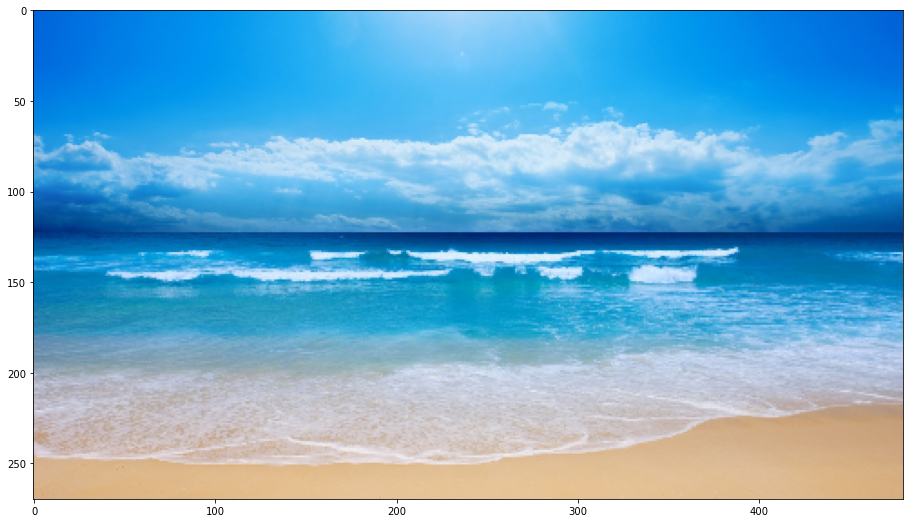

In [2]:
lr = cv2.resize(hr, dsize=(480, 270))
print(lr.shape)

plt.figure(figsize=(16, 9))
plt.imshow(lr)

    3) 줄인 저해상도 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 apply_srgan 함수를 사용하면 쉽습니다.

In [3]:
import tensorflow as tf
import os

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

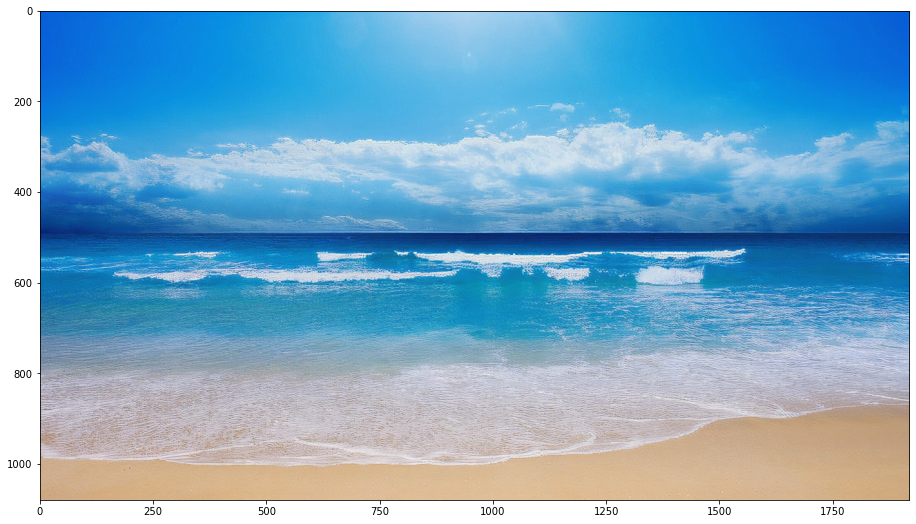

In [4]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

srgan_hr = apply_srgan(lr)

# 시각화
plt.figure(figsize=(16,9))
plt.imshow(srgan_hr)

    4) 2.의 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다. 마찬가지로 cv2.resize()를 사용해 봅시다.

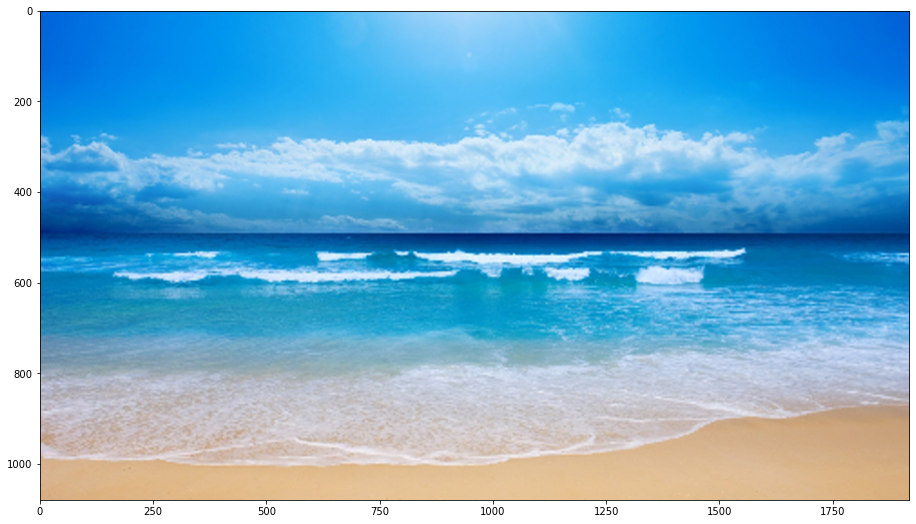

In [5]:
# 저해상도 이미지를 고해상도 이미지 크기로 bicubic interpolation
hr, lr = np.array(hr), np.array(lr)  
bicubic_hr = cv2.resize(
     lr,
     dsize=(hr.shape[1], hr.shape[0]),    # 고해상도 이미지 크기로 설정
     interpolation=cv2.INTER_CUBIC)        # bicubic 설정


# 시각화
plt.figure(figsize=(16,9))
plt.imshow(bicubic_hr)

    5) 3개 이미지(Bicubic의 결과, SRGAN의 결과, 원래 고해상도 이미지)를 나란히 시각화합니다. 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해 주세요

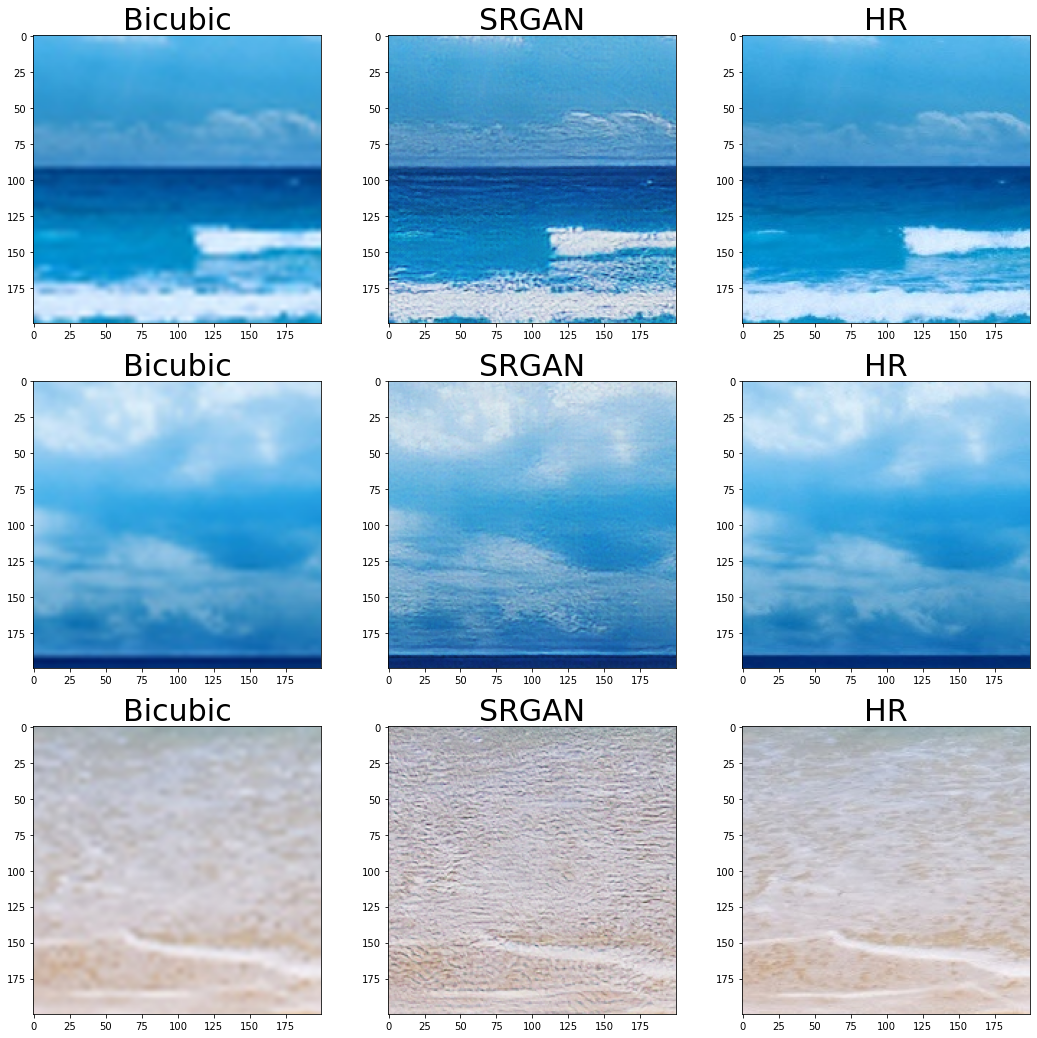

In [6]:
def crop(image, left_top, x=100, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

# 자세히 시각화 하기 위해 3개 영역을 잘라냅니다.
# 아래는 잘라낸 부분의 좌상단 좌표 3개 입니다.
left_tops =  [(400,500), (300,1200), (800,500)]

images = []
for left_top in left_tops:
    img1 = crop(bicubic_hr, left_top, 200, 200)
    img2 = crop(srgan_hr , left_top, 200, 200)
    img3 = crop(hr, left_top, 200, 200)
    images.extend([img1, img2, img3])

labels = ["Bicubic", "SRGAN", "HR"] * 3

plt.figure(figsize=(18,18))
for i in range(9):
    plt.subplot(3,3,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)

    6) 선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)
    
      Bicubic은 뭉개져 있는 듯한 느낌을 주고 SRGAN을 통해 복구한 고해상도 이미지는 살짝 거친 느낌이 들게 복원되었다. 확대해서 보면 원본과의 느낌은 Bicubic이 더 가깝지만 질감이나 느낌은 SRGAN이 더 잘 살렸다고 생각한다. 이 차이는 사용되는 복원 방식의 삼차보간법과 인접한 픽셀과의 관계에 따라서 달라지는 것 같다.

## 2. 원본이 저화질인 이미지

    1) 적당히) 낮은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.


(169, 300, 3)


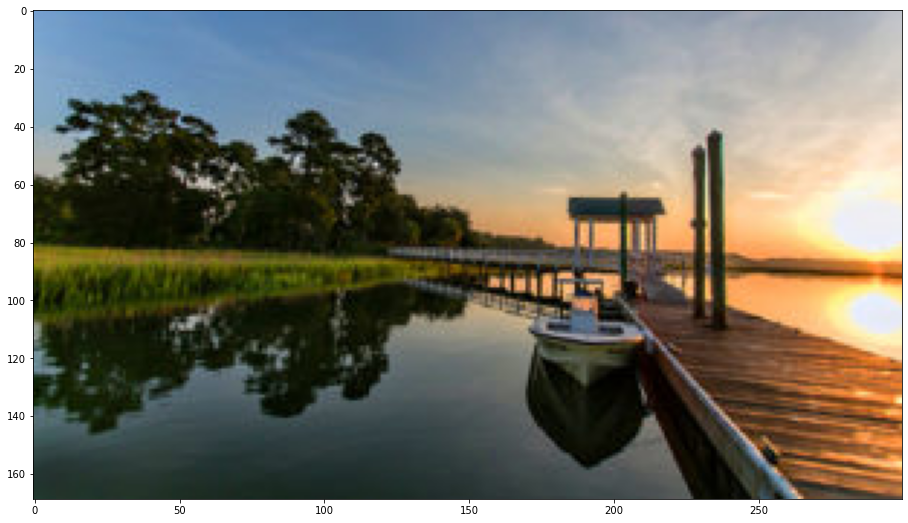

In [7]:
# 데이터를 불러옵니다.
image_path = os.getenv('HOME') + '/aiffel/super_resolution/low_resolution.jpg'
hr = cv2.imread(image_path)
hr = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)

print(hr.shape)
plt.figure(figsize=(16, 9))
plt.imshow(hr)
plt.show()

    2) 불러온 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 apply_srgan 함수를 사용하면 쉽습니다.


(676, 1200, 3)


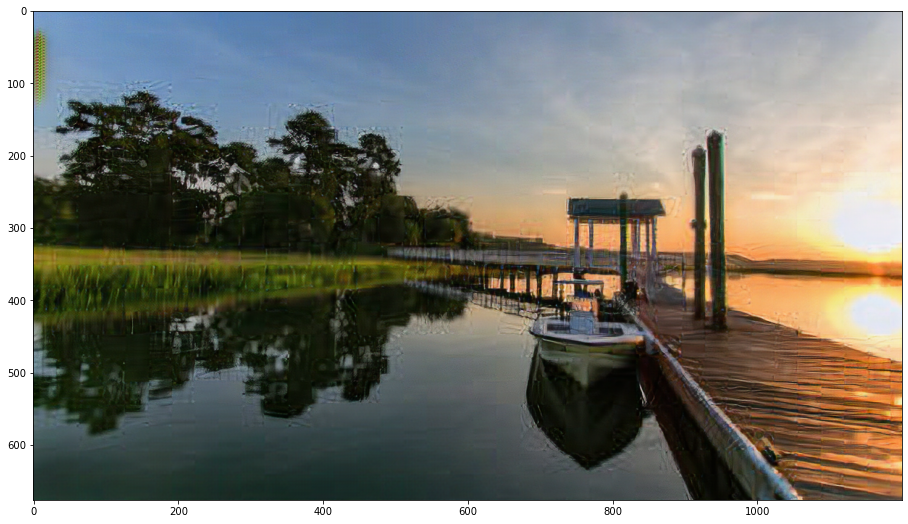

In [8]:
srgan_hr = apply_srgan(hr)
print(srgan_hr.shape)

# 시각화
plt.figure(figsize=(16,9))
plt.imshow(srgan_hr)

    3) 1.에서 불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다. cv2.resize()를 사용해 봅시다.


(676, 1200, 3)


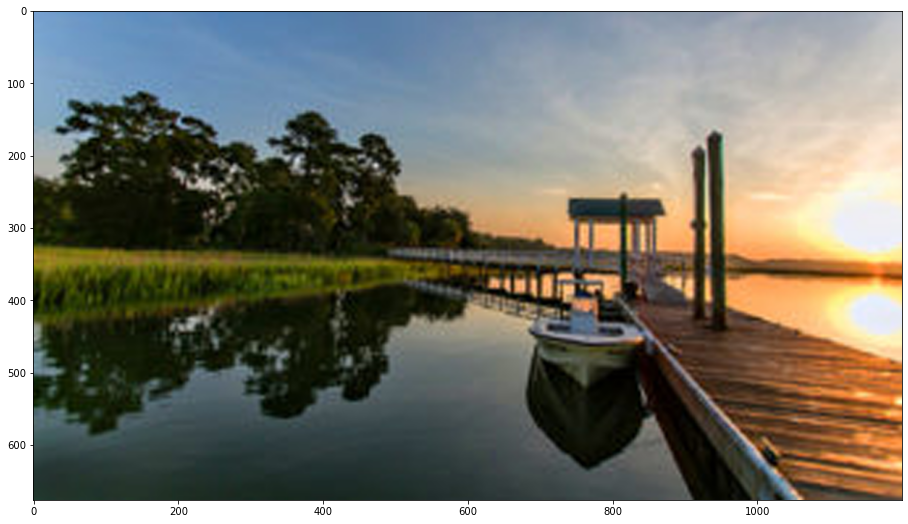

In [9]:
# 저해상도 이미지를 고해상도 이미지 크기로 bicubic interpolation
hr = np.array(hr) 
bicubic_hr = cv2.resize(
     hr,
     dsize=(srgan_hr.shape[1], srgan_hr.shape[0]),    # 고해상도 이미지 크기로 설정
     interpolation=cv2.INTER_CUBIC)        # bicubic 설정

print(bicubic_hr.shape)
# 시각화
plt.figure(figsize=(16,9))
plt.imshow(bicubic_hr)

    4) 2개 이미지(3.의 Bicubic의 결과, 2.의 SRGAN의 결과)를 나란히 시각화합니다. 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해 주세요. 이전 시각화에 사용했던 코드를 참고하면 어렵지 않습니다.


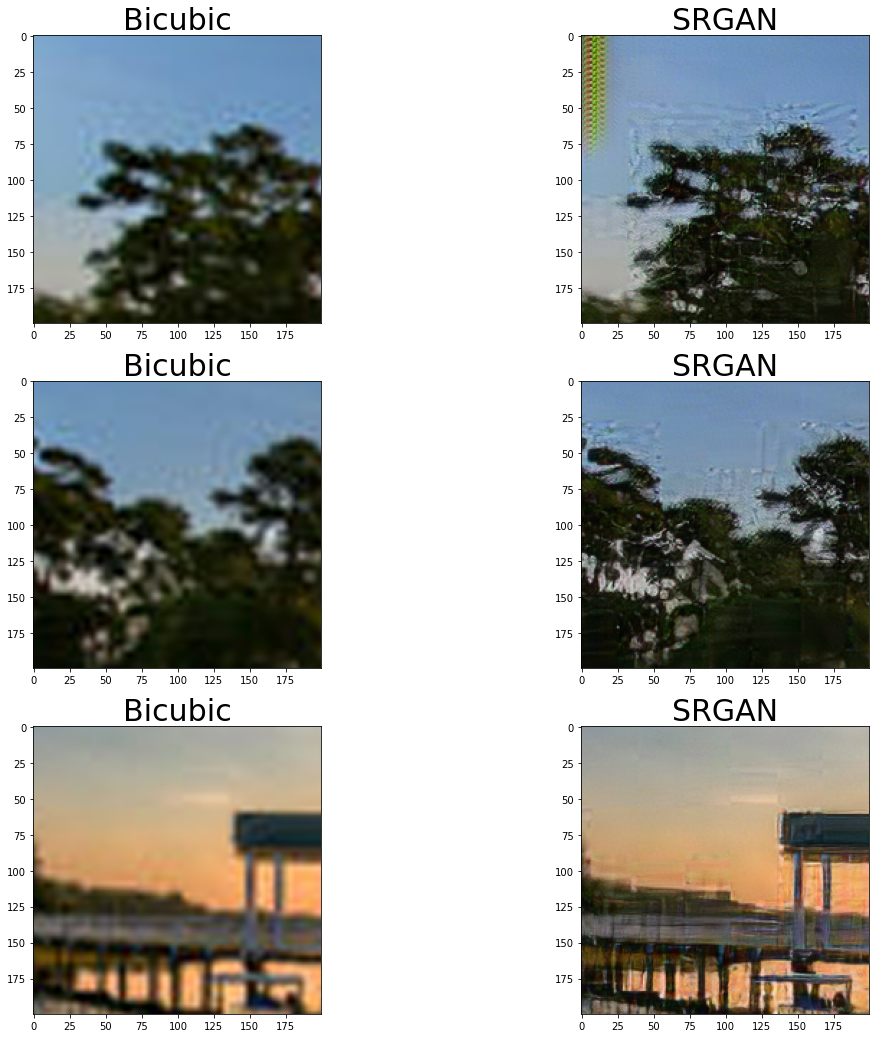

In [10]:
left_tops = [(50,0), (100,200), (200,600)]

images = []
for left_top in left_tops:
    img1 = crop(bicubic_hr, left_top, 200, 200)
    img2 = crop(srgan_hr , left_top, 200, 200)
    images.extend([img1, img2])

labels = ["Bicubic", "SRGAN"] * 3

plt.figure(figsize=(18,18))
for i in range(6):
    plt.subplot(3,2,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=30)

    5) 선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)
    
      복원한 이미지를 확인 한 결과, Bicubic은 위의 1번 프로젝트와 별다른 특이점이 없었지만 SRGAN의 경우 왼쪽 윗편에 이상한 노이즈가 발생하였다. 원래 이미지에 덧씌워서 복원하는 모델이라서 복원 시 문제가 생긴것 같다.

## 3. SRGAN을 이용해 고해상도 gif 생성하기

    1) gif 파일 불러오기

In [11]:
import cv2

# 다운받은 파일의 경로를 설정해 주세요.
gif_path = os.getenv('HOME')+'/aiffel/super_resolution/wine_lr.gif'
gif = cv2.VideoCapture(gif_path)

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))

frame 수 : 13
frame 크기 : (340, 355, 3)


    2) 프레임별 Super Resolution 진행하기

In [12]:
frames_sr = [] 

for i in range(13):
    sr = apply_srgan(frames[i])
    frames_sr.append(sr)

print("frame 수 :", len(frames_sr))
print(f'frame 크기: {frames_sr[0].shape}')

frame 수 : 13
frame 크기: (1360, 1420, 3)


In [13]:
frames_bi = []

def apply_bicubic(image):
    bicubic_hr = cv2.resize(
         image,
         dsize=(frames_sr[0].shape[1], frames_sr[0].shape[0]),    # 고해상도 이미지 크기로 설정
         interpolation=cv2.INTER_CUBIC)        # bicubic 설정
    return bicubic_hr

for i in range(13):
    bi = apply_bicubic(frames[i])
    frames_bi.append(bi)

print("frame 수 :", len(frames_bi))
print(f'frame 크기: {frames_bi[0].shape}')

frame 수 : 13
frame 크기: (1360, 1420, 3)


    3) 프레임을 합쳐 gif 만들기


In [14]:
import imageio

imageio.mimsave(os.getenv('HOME') +"/aiffel/super_resolution/wine_sr.gif", frames_sr)
imageio.mimsave(os.getenv('HOME') +"/aiffel/super_resolution/wine_bi.gif", frames_bi)

In [18]:
from IPython.display import Image as show_gif

#show_gif(os.getenv('HOME') +"/aiffel/super_resolution/wine_lr.gif", width=800) # width 는 적당히 큰 값으로 설정해주세요

In [19]:
#show_gif(os.getenv('HOME') +"/aiffel/super_resolution/wine_sr.gif", width=800) # width 는 적당히 큰 값으로 설정해주세요

In [20]:
#show_gif(os.getenv('HOME') +"/aiffel/super_resolution/wine_bi.gif", width=800) # width 는 적당히 큰 값으로 설정해주세요

      주로 잔과 병목, 그리고 따르는 액체의 모습에서 각각의 차이가 느껴졌다. SRGAN의 경우 좀 더 도트가 느껴졌고 Bicubic이 좀 더 부드러운 느낌이다.

***
# 결론 및 느낀 점

      확대해서 볼 경우 SRGAN의 경우 생각보다 좀 더 도트가 도드라져서 튀는 모습을 보였고 Bicubic은 좀 더 부드럽지만 섬세하거나 자세한 표현력은 떨어지는 것 같았다. 그러나 전체적으로 보면 SRGAN이 디테일이 도드라져서 보여서 좀 더 원본의 디테일이 느껴지는 듯한 느낌이였다.
      
      각각의 필요한 경우에 따라 복원에 사용하는 모델을 변경해서 최선의 결과를 찾아야할 것 같다.
      
      개인적으로 듣던 소위 짭4K라는 소프트웨어로 이미지나 영상을 업스케일링해서 보여주는 기법을 직접 해볼 수 있어서 재밌었다.